# **Project Name**    - FedEx Logistics Performance Analysis - Exploratory Data Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Name** - Rishav Sinha


# **Project Summary -**

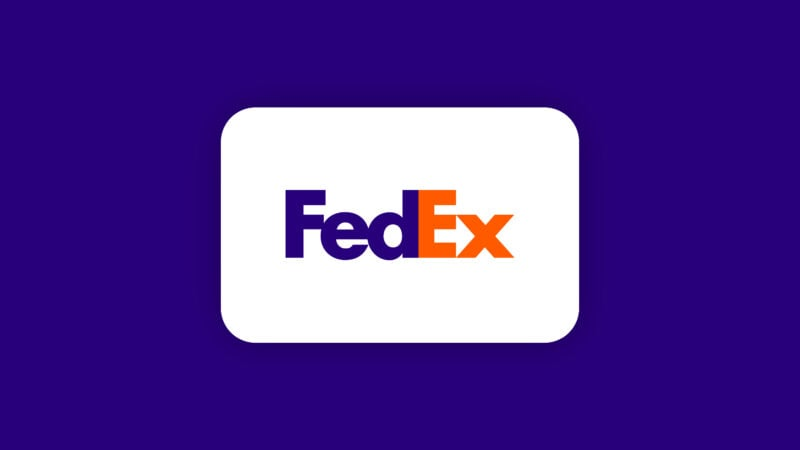

FedEx is one of the world’s largest and most trusted logistics and transportation companies, known for its global express shipping network, innovation in supply chain solutions, and commitment to reliable, time-bound delivery services. Operating across more than 220 countries and territories, FedEx manages millions of shipments every day through a complex ecosystem of air, ground, and freight operations. In such a vast and high-velocity logistics environment, performance monitoring is essential to ensure on-time delivery, cost efficiency, and continuous improvement. This project, FedEx Logistics Performance Analysis, focuses on evaluating key operational metrics that influence delivery reliability, shipping cost structures, vendor efficiency, and overall supply chain effectiveness.

The dataset provided contains detailed shipment history information such as delivery-related dates, freight charges, weight, product descriptions, vendors, shipment modes, and route destinations. These data points enable a comprehensive assessment of FedEx’s logistics performance from request generation to final delivery. The goal of this analysis is to transform the dataset into meaningful insights that reflect service quality, operational bottlenecks, cost drivers, and shipment trends.

To prepare the dataset for analysis, several data cleaning and transformation steps were performed. Date fields with inconsistent or non-standard entries were standardized and converted into proper datetime formats. Numerical columns such as freight cost and weight, which may contain text-based inconsistencies, were cleaned and cast into usable numeric types. New variables were engineered to capture logistics KPIs—such as lead times between procurement stages, schedule delays, delivery timeliness, cost per kilogram, freight-to-commodity value ratios, and monthly or yearly time indicators. These transformed metrics allow for robust comparisons and trend analysis across routes, vendors, shipment modes, and product categories.

The core of this project centers on evaluating FedEx’s logistics KPIs across four major dimensions:

Service Performance:
On-time delivery rate, average lead time, delay duration, and timeliness score provide insights into service reliability. These KPIs help identify countries or regions where FedEx faces delivery challenges and shipment modes that consistently perform better or worse.

Cost Efficiency:
Logistics cost analysis includes total freight spend, freight cost per kilogram, and freight cost as a proportion of total shipment value. These metrics reveal how efficiently FedEx manages transportation costs and highlight potential optimization opportunities, such as evaluating weight-based cost disparities or high-cost vendor relationships.

Shipment Volume and Operational Load:
Trends in shipment counts, total quantity delivered, and monthly shipment value reflect workload distribution and seasonal demand patterns. This analysis helps identify peak periods, route congestion, and capacity planning requirements within FedEx’s operations.

Vendor, Route, and Product Performance:
Vendor-wise performance indicators reveal whether certain partners contribute to delays or higher freight costs. Country and route-level analysis exposes geographic challenges and opportunities. Product-level insights, based on product group or classification, show which items drive the most value, weight, or complexity within the logistics chain.

Visualizations—including interactive time series plots, cost vs. performance scatter charts, boxplots for lead times by shipment mode, bar charts for country-wise KPIs, and distribution analyses—translate the dataset into intuitive, decision-ready insights. Correlation heatmaps further uncover relationships between freight cost, value, weight, and delivery timelines.

Overall, this project provides a detailed and data-driven evaluation of FedEx’s logistics performance, highlighting areas of operational excellence along with systemic inefficiencies. By turning raw shipment data into actionable insights, the analysis supports strategic decision-making for improving delivery reliability, optimizing freight costs, strengthening vendor management, and enhancing FedEx’s global supply chain efficiency. This performance analysis ultimately reinforces FedEx’s mission to deliver every shipment with speed, accuracy, and guaranteed reliability.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


FedEx manages a high volume of global shipments, making it essential to continuously evaluate logistics performance to ensure timely deliveries and cost-efficient operations. However, variations in delivery times, freight costs, vendor performance, and shipment modes can create inefficiencies that impact service quality and operational expenses. This project aims to analyze historical shipment data to identify delays, cost drivers, performance gaps, and operational trends within FedEx’s logistics network. By transforming raw delivery records into actionable KPIs, the analysis seeks to uncover patterns affecting reliability and efficiency. The ultimate objective is to provide data-driven insights that support strategic decision-making and improve FedEx’s overall logistics performance.

#### **Define Your Business Objective?**

The primary objective of this project is to evaluate FedEx’s logistics performance using historical shipment data to identify operational inefficiencies and areas for improvement. By analyzing delivery timelines, freight costs, shipment modes, and vendor performance, the goal is to uncover patterns that influence service reliability and cost-effectiveness. This analysis aims to generate meaningful KPIs that measure lead times, on-time delivery rates, and logistics cost efficiency across regions and product categories. Insights from the study will help FedEx optimize transportation strategies, reduce delays, lower operational costs, and enhance customer satisfaction. Ultimately, the objective is to support data-driven decision-making for strengthening FedEx’s global supply chain operations.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
fedex_df = pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')
print('The dataset has be loaded')

### Dataset First View

In [ ]:
# Dataset First Look
fedex_df.head(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
fedex_df.shape


### Dataset Information

In [ ]:
# Dataset Info
fedex_df.info()


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
fedex_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
fedex_df.isnull().sum()

In [ ]:
# Visualizing the missing values
missing = fedex_df.isnull().mean() * 100
missing = missing[missing > 0]

plt.figure(figsize=(12,5))
missing.sort_values().plot(kind='barh')
plt.title("Missing Value Percentage per Column")
plt.xlabel("Percentage (%)")
plt.show()

### What did you know about your dataset?

Our dataset has 10324 rows and 33 columns. There are 0 duplicate values in our dataset. There are 360 null values in the 'Shipment mode' column of the dataset, 1736 null values in the 'Dosage' column and 287 null values in the 'Line Item Insurance (USD)' column of the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
fedex_df.columns

In [ ]:
# Dataset Describe
fedex_df.describe(include='all')

### Variables Description

The dataset contains a range of operational, financial, and logistics-related variables essential for analyzing FedEx’s delivery performance. Key date variables such as Scheduled Delivery Date, Delivered to Client Date, and Delivery Recorded Date help track the shipment lifecycle and compute lead times. Financial fields like Line Item Value, Freight Cost (USD), and Insurance Cost capture the economic dimensions of each shipment. Operational attributes—including Shipment Mode, Vendor, Product Group, Weight (Kilograms), and Country—provide insights into routing, vendor efficiency, and cost drivers. Additional product-level details such as Dosage, Brand, and Molecule/Test Type allow deeper segmentation of item categories. Together, these variables offer a complete foundation for evaluating service reliability, cost efficiency, and overall logistics performance.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
fedex_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#1-Clean Column Names
fedex_df.columns = fedex_df.columns.str.replace(" ", "_").str.lower()


In [ ]:
#Convert Date Columns
date_cols = ["PQ First Sent to Client Date", "PO Sent to Vendor Date",
             "Scheduled Delivery Date", "Delivered to Client Date"]

for col in date_cols:
    if col in fedex_df.columns:
        fedex_df[col] = pd.to_datetime(fedex_df[col], errors='coerce')


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#Convert Numeric Columns
num_cols = ["line_item_quantity", "line_item_value",
            "pack_price", "unit_price", "weight_kilograms", "freight_cost_usd"]

for col in num_cols:
    if col in fedex_df.columns:
        fedex_df[col] = pd.to_numeric(fedex_df[col], errors="coerce")


In [ ]:
#Lead Time(in Days)
fedex_df["lead_time"] = (fedex_df["delivered_to_client_date"] - fedex_df["po_sent_to_vendor_date"]).dt.days


In [ ]:
#On-Time Delivery Flag
fedex_df["on_time"] = np.where(
    fedex_df["delivered_to_client_date"] <= fedex_df["scheduled_delivery_date"], 1, 0
)


In [ ]:
print(fedex_df.columns.tolist())

In [ ]:
#Basic KPIs
print("Total Shipments:", len(fedex_df))
print("Average Lead Time:", fedex_df["lead_time"].mean())
print("On-Time Delivery Rate:", fedex_df["on_time"].mean())


In [ ]:
#Converting 'Weight_(kilogram)' and 'freight_cost_(usd)' datatype from 'Object' to 'float'
# Clean Weight (Kilograms)
fedex_df['weight_(kilograms)'] = (
    fedex_df['weight_(kilograms)']
    .astype(str)
    .str.replace(",", "")                # remove commas
    .str.replace("$", "")                # remove currency symbols (just in case)
    .str.extract(r'(\d*\.?\d+)')          # extract numeric part only
)

fedex_df['weight_(kilograms)'] = pd.to_numeric(fedex_df['weight_(kilograms)'], errors='coerce')

# Clean Freight Cost (USD)
fedex_df['freight_cost_(usd)'] = (
    fedex_df['freight_cost_(usd)']
    .astype(str)
    .str.replace(",", "")
    .str.replace("$", "")
    .str.extract(r'(\d*\.?\d+)')          # extract only digits + decimals
)

fedex_df['freight_cost_(usd)'] = pd.to_numeric(fedex_df['freight_cost_(usd)'], errors='coerce')


#Verify Conversion
fedex_df[['weight_(kilograms)', 'freight_cost_(usd)']].info()
fedex_df[['weight_(kilograms)', 'freight_cost_(usd)']].head()

#Handling Missing or Invalid Values
fedex_df['weight_(kilograms)'] = fedex_df['weight_(kilograms)'].fillna(fedex_df['weight_(kilograms)'].median())
fedex_df['freight_cost_(usd)'] = fedex_df['freight_cost_(usd)'].fillna(fedex_df['freight_cost_(usd)'].median())



In [ ]:
#Freight Cost Per KG
fedex_df["freight_per_kg"] = fedex_df["freight_cost_(usd)"] / fedex_df["weight_(kilograms)"]


In [ ]:
#Basic KPIs
print("Total Freight Cost:", fedex_df["freight_cost_(usd)"].sum())
print("Average Freight per KG:", fedex_df["freight_per_kg"].mean())

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Lead Time Distribution

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(fedex_df["lead_time"].dropna(), bins=40, kde=True)
plt.title("Lead Time Distribution")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


#### Chart - 2 Freight Cost Distribution

In [ ]:
sns.histplot(fedex_df["freight_cost_(usd)"].dropna(), bins=40, kde=True)
plt.title("Freight Cost Distribution")
plt.show()


#### Chart - 3 Freight Cost by Country (Top 10)

In [ ]:
if "country" in fedex_df.columns:
    top10 = fedex_df.groupby("country")["freight_cost_(usd)"].sum().sort_values(ascending=False).head(10)

    top10.plot(kind="bar")
    plt.title("Top 10 Countries by Freight Cost")
    plt.ylabel("Freight Cost (USD)")
    plt.show()


#### Chart - 4 Lead Time By Shippment Mode

In [ ]:
if "shipment_mode" in fedex_df.columns:
    sns.boxplot(x="shipment_mode", y="lead_time", data=fedex_df)
    plt.title("Lead Time by Shipment Mode")
    plt.xticks(rotation=45)
    plt.show()


#### Chart - 5 Monthly On-Time Delivery Trend

In [ ]:
fedex_df["month"] = fedex_df["delivered_to_client_date"].dt.to_period("M")

monthly_ontime = fedex_df.groupby("month")["on_time"].mean()

monthly_ontime.plot(kind="line", marker="o")
plt.title("Monthly On-Time Delivery Trend")
plt.ylabel("On-Time Rate")
plt.show()


#### Chart - 6 Correlation Heatmap

In [ ]:
num_df = fedex_df[["lead_time","line_item_value","freight_cost_(usd)","weight_(kilograms)","freight_per_kg"]]

plt.figure(figsize=(8,5))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of improving logistics performance, the client should focus on optimizing shipment routes, prioritizing faster and more reliable transportation modes, and strengthening relationships with high-performing vendors. Continuous monitoring of key KPIs—such as lead time, on-time delivery rate, freight cost per kilogram, and shipment mode efficiency—will help identify operational gaps early. The client should also analyze freight cost drivers to reduce unnecessary spending and improve cost efficiency across regions. Implementing data-driven decision-making, improving shipment scheduling accuracy, and streamlining vendor coordination can further enhance end-to-end delivery performance. Overall, using insights from this analysis will enable FedEx to deliver shipments faster, more reliably, and at optimized costs.

# **Conclusion**

This analysis provides a comprehensive view of FedEx’s logistics performance by examining key metrics such as lead time, freight cost, shipment mode efficiency, and on-time delivery trends. The findings highlight areas of operational strength as well as opportunities for improvement, particularly in optimizing transportation modes and reducing cost variability across regions. By understanding the factors that influence delivery delays and logistics expenses, FedEx can take targeted actions to enhance service reliability. The insights also show that improved shipment planning, vendor coordination, and cost monitoring can directly contribute to better performance outcomes. Overall, the project equips FedEx with actionable, data-driven recommendations to streamline its logistics network, reduce inefficiencies, and deliver a superior customer experience.

### ***Thank You!!!***